In [1]:
import numpy as np
import minterpy as mp
import matplotlib.pyplot as plt
import scipy
from minterpy.utils import eval_newton_polynomials
from sklearn.preprocessing import MinMaxScaler

In [2]:
target_scaler = MinMaxScaler()


In [3]:
multi_indices = np.loadtxt('multi_indices.csv', delimiter=',')


In [4]:
dataset = np.loadtxt('data.csv', delimiter=',')
input = dataset[:, :-1]
target = dataset[:, -1:]

In [5]:
test_dataset = np.loadtxt('test_data.csv', delimiter=',')
test_input = test_dataset[:, :-1]
test_target = test_dataset[:, -1:]

In [6]:
test_target_scaled = np.loadtxt('test_target_scaled.csv', delimiter=',')
target_scaler.fit(test_target_scaled.reshape(-1,1))

MinMaxScaler()

In [7]:
mi =  np.flip(multi_indices, axis = 1)

In [8]:
def get_regression_matrix(lag_poly, points):
    """ constructs the regression matrix by evaluating the lagrange monomials on
    all the points.
    :return: (k x N) the value of each Lagrange monomial in Newton form at each point.
    """

    coeffs_newton = mp.get_transformation(lag_poly, mp.NewtonPolynomial).transformation_operator.array_repr_full
    exponents = lag_poly.multi_index.exponents
    generating_points = lag_poly.grid.generating_points
    return eval_newton_polynomials(points, coeffs_newton, exponents,
                     generating_points)

In [9]:
multiindex = mp.MultiIndexSet.from_degree(3, 4, 2).exponents

In [10]:
mi = mp.MultiIndexSet(mi)

In [11]:
lag=mp.LagrangePolynomial(mi)

In [12]:
R = get_regression_matrix(lag, input)
coeffs_lagrange, _, _, _ = scipy.linalg.lstsq(R, target)
lag_reg = mp.LagrangePolynomial(mi,coeffs=coeffs_lagrange)
l2n_regtf = mp.transformations.LagrangeToNewton(lag_reg)
newt_poly_reg = l2n_regtf()

In [25]:
print('Number of coefficients:', len(coeffs_lagrange))

Number of coefficients: 349


In [13]:
outputs = newt_poly_reg(test_input)
outputs = target_scaler.inverse_transform(outputs.reshape(-1,1))

In [14]:
def MSE(outputs, targets):
    return np.mean((outputs - targets)**2)

In [15]:
mse = MSE(outputs, test_target_scaled)

In [20]:
print('MSE:',mse)

MSE: 1623.1919705393584


In [17]:
l_inf = np.max(abs(outputs-test_target_scaled))

In [22]:
print('L_inf error:', l_inf)

L_inf error: 239.59513002360384


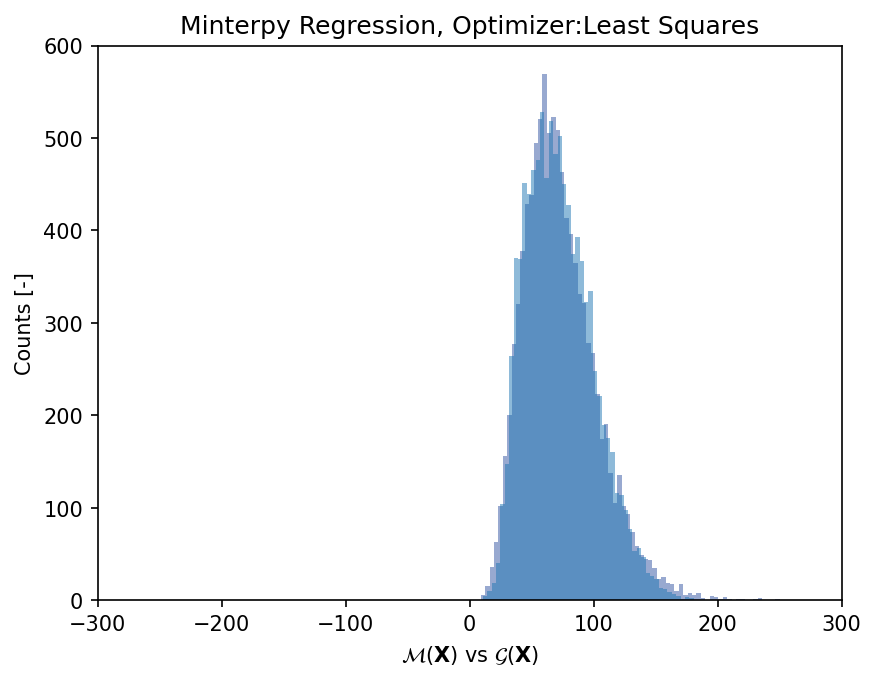

In [19]:
model_name = ['Minterpy Regression']
Optimizer_name = ['Least Squares']

outputs = newt_poly_reg(test_input)
outputs = target_scaler.inverse_transform(outputs.reshape(-1,1))
test_target = test_target



fig1 = plt.figure()
plt.hist(test_target_scaled, bins="auto", color="#8da0cb", alpha = 0.9)
plt.hist(outputs, bins='auto', alpha = 0.5)
plt.xlim(-300, 300)
plt.ylim(0, 600)
plt.title(model_name[0] +', Optimizer:'+ Optimizer_name[0])
#plt.title(Optimizer_name[j])
plt.xlabel("$\mathcal{M}(\mathbf{X})$ vs $\mathcal{G}(\mathbf{X})$")
plt.ylabel("Counts [-]")
plt.gcf().set_dpi(150);